# Importing packages

In [2]:
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
filename='matches.csv'



# 1.Data understanding

In [9]:

data = pd.read_csv(filename)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
deliveries_df = pd.read_csv('deliveries.csv')
deliveries_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
id                 756 non-null int64
season             756 non-null int64
city               749 non-null object
date               756 non-null object
team1              756 non-null object
team2              756 non-null object
toss_winner        756 non-null object
toss_decision      756 non-null object
result             756 non-null object
dl_applied         756 non-null int64
winner             752 non-null object
win_by_runs        756 non-null int64
win_by_wickets     756 non-null int64
player_of_match    752 non-null object
venue              756 non-null object
umpire1            754 non-null object
umpire2            754 non-null object
umpire3            119 non-null object
dtypes: int64(5), object(13)
memory usage: 106.4+ KB


In [10]:
data.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


# TOTAL NO.OF MATCHES PLAYED IN EACH SEASON

Number of matches played so far in IPL :  756
Number of seasons in IPL :  12
Number of Teams participated in IPL :  15


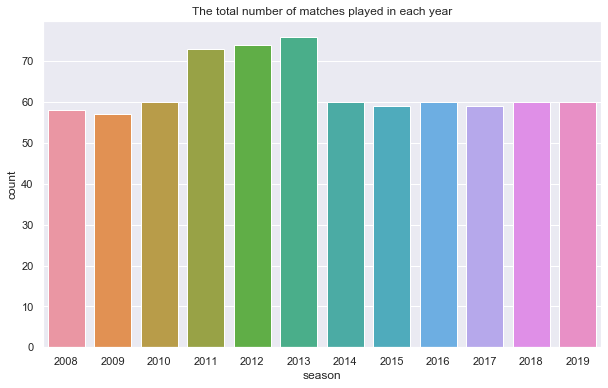

In [11]:
sns.set(style="darkgrid")
print("Number of matches played so far in IPL : ", data.shape[0])
print("Number of seasons in IPL : ", len(data.season.unique()))
print("Number of Teams participated in IPL : ", len(data.team1.unique()))
#print("Number of Teams participated in IPL : ", len(data.team2.unique())) 
plt.figure(figsize=(10,6))
sns.countplot(x='season', data=data)
plt.title('The total number of matches played in each year')
plt.show()



 # NUMBER OF MATCHES IN EACH VENUE

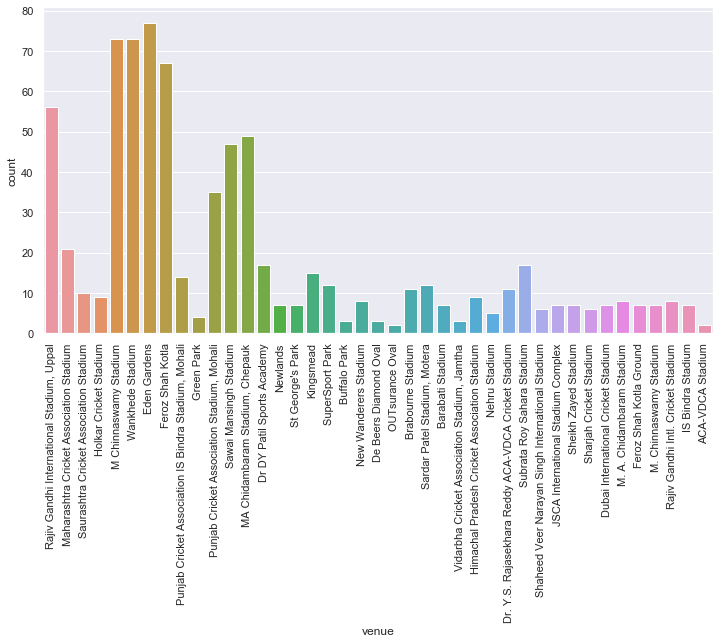

In [12]:
plt.figure(figsize=(12,6))
sns.countplot(x='venue', data=data)
plt.xticks(rotation='vertical')
plt.show()

In [19]:
df = pd.melt(data, id_vars=['id','season'], value_vars=['team1', 'team2'])
df.head()

,id,season,variable,value
0,1,2017,team1,Sunrisers Hyderabad
1,2,2017,team1,Mumbai Indians
2,3,2017,team1,Gujarat Lions
3,4,2017,team1,Rising Pune Supergiant
4,5,2017,team1,Royal Challengers Bangalore


# MOST PLAYED TEAMS

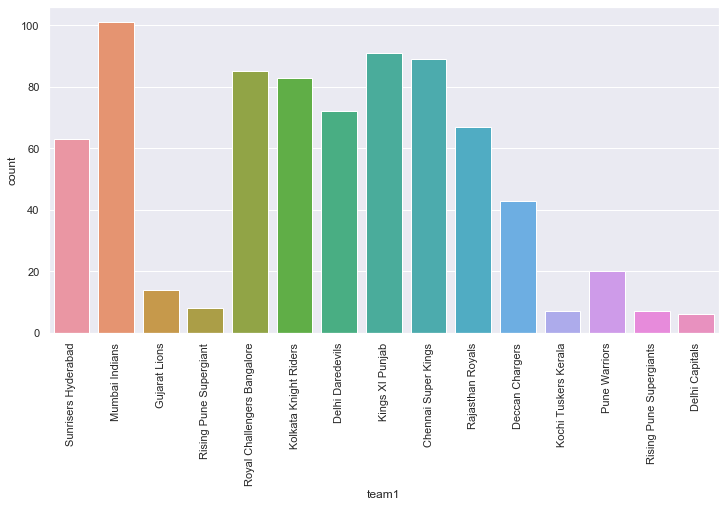

In [17]:

plt.figure(figsize=(12,6))
sns.countplot(x='team1', data=data)
plt.xticks(rotation='vertical')
plt.show()

# MATCHES PLAYED AT EDEN GARDENS 

In [21]:

eden_df = data[data['venue'] == 'Eden Gardens']
eden_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
10,11,2017,Kolkata,2017-04-13,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN
13,14,2017,Kolkata,2017-04-15,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Kolkata Knight Riders,17,0,RV Uthappa,Eden Gardens,AY Dandekar,NJ Llong,NaN
22,23,2017,Kolkata,2017-04-21,Kolkata Knight Riders,Gujarat Lions,Gujarat Lions,field,normal,0,Gujarat Lions,0,4,SK Raina,Eden Gardens,CB Gaffaney,Nitin Menon,NaN
26,27,2017,Kolkata,2017-04-23,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,82,0,NM Coulter-Nile,Eden Gardens,CB Gaffaney,CK Nandan,NaN
30,31,2017,Kolkata,2017-04-28,Delhi Daredevils,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,G Gambhir,Eden Gardens,NJ Llong,S Ravi,NaN


In [22]:
eden_df_1 = pd.melt(eden_df, id_vars=['id','season'], value_vars=['team1', 'team2'])
eden_df_1.head()

,id,season,variable,value
0,11,2017,team1,Kings XI Punjab
1,14,2017,team1,Kolkata Knight Riders
2,23,2017,team1,Kolkata Knight Riders
3,27,2017,team1,Kolkata Knight Riders
4,31,2017,team1,Delhi Daredevils


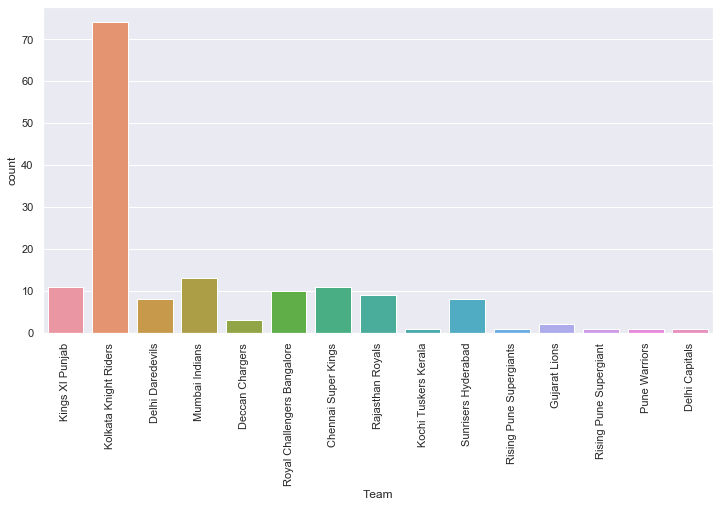

In [23]:

eden_df_1.columns = ['id', 'season', 'varaible', 'Team']
plt.figure(figsize=(12,6))
sns.countplot(x='Team', data=eden_df_1)
plt.xticks(rotation='vertical')
plt.show()

# 2.DATA PREPARATION

In [21]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [43]:
deliveries_df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [45]:
deliveries_df.drop(['player_dismissed', 'dismissal_kind', 'fielder'],axis=1,inplace=True)


In [49]:
#converting the data format into weekdays
data['date'] = pd.to_datetime(data['date'])
data["WeekDay"] = data["date"].dt.weekday
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,2
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,3
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,4
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,5
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5


##   The win percentage of a team batting second at Wankhede Stadium during 2008 to 2019

In [51]:
df = data[(data['toss_decision'] == 'field') &  (data['venue'] == 'Wankhede Stadium') &
             (data['season'] >= 2008) & (data['season'] <= 2019)
             ]
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
6,7,2017,Mumbai,2017-04-09,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,6
9,10,2017,Mumbai,2017-04-12,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,2
15,16,2017,Mumbai,2017-04-16,Gujarat Lions,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,6,N Rana,Wankhede Stadium,A Nand Kishore,S Ravi,NaN,6
23,24,2017,Mumbai,2017-04-22,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,14,0,MJ McClenaghan,Wankhede Stadium,A Nand Kishore,S Ravi,NaN,5
27,28,2017,Mumbai,2017-04-24,Rising Pune Supergiant,Mumbai Indians,Mumbai Indians,field,normal,0,Rising Pune Supergiant,3,0,BA Stokes,Wankhede Stadium,A Nand Kishore,S Ravi,NaN,0


## Best IPL team in history 

In [53]:
#BEST IPL TEAM 
df = data.loc[data.groupby('season').date.idxmax()]
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,WeekDay
116,117,2008,Mumbai,2008-06-01,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen,NaN,6
173,174,2009,Johannesburg,2009-05-24,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel,NaN,6
233,234,2010,Mumbai,2010-04-25,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel,NaN,6
306,307,2011,Chennai,2011-05-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel,NaN,5
380,381,2012,Chennai,2012-05-27,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel,NaN,6


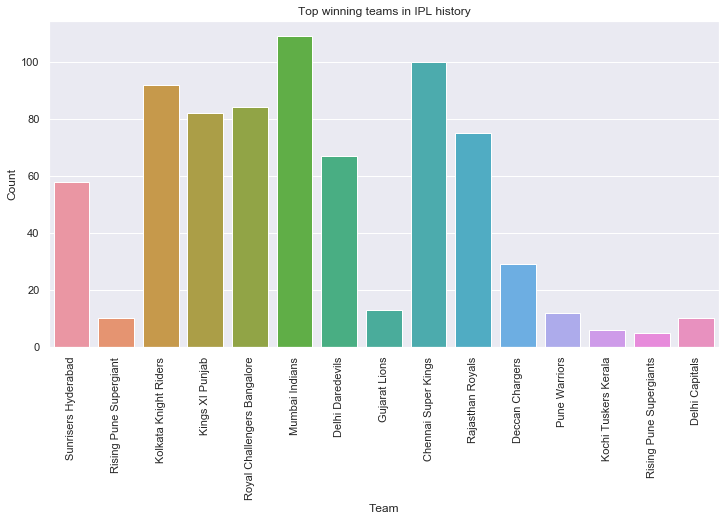

In [25]:
plt.figure(figsize=(12,6))

plt.title('Top winning teams in IPL history')
sns.countplot(x='winner', data=data)
plt.xlabel("Team")
plt.ylabel("Count")
plt.xticks(rotation='vertical')
plt.show()


## Team that had won by maximum runs

In [6]:

data.iloc[data['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

## Team that had won by minimum runs

In [7]:

data.iloc[data['win_by_runs'].idxmin()]

id                                                       2
season                                                2017
city                                                  Pune
date                                            2017-04-06
team1                                       Mumbai Indians
team2                               Rising Pune Supergiant
toss_winner                         Rising Pune Supergiant
toss_decision                                        field
result                                              normal
dl_applied                                               0
winner                              Rising Pune Supergiant
win_by_runs                                              0
win_by_wickets                                           7
player_of_match                                  SPD Smith
venue              Maharashtra Cricket Association Stadium
umpire1                                     A Nand Kishore
umpire2                                             S Ra

## Did toss-winning helped in match winning ?

In [27]:

ss=data['toss_winner']==data['winner']
ss.groupby(ss).size()

False    363
True     393
dtype: int64

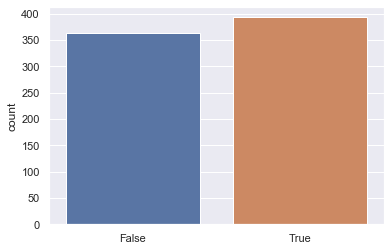

In [28]:
sns.countplot(data['toss_winner']==data['winner'])
sns.countplot(ss);

## Team that won by maximum wickets

In [15]:

data.iloc[data['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

## Team that won by minimum wickets

In [16]:

data.iloc[data['win_by_wickets'].idxmin()]['winner']

'Sunrisers Hyderabad'

## Top players of the match 

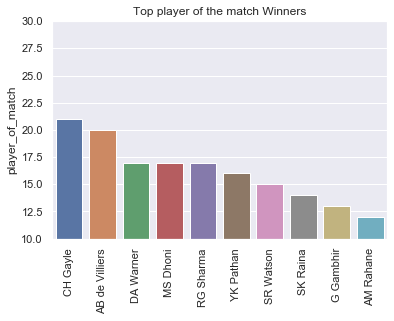

In [29]:

top_players = data.player_of_match.value_counts()[:10]

fig, ax = plt.subplots()
ax.set_ylim([10,30])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v');

plt.show()

## Best batting team 

In [44]:

data.winner[data.win_by_wickets!=0].mode()

0    Kolkata Knight Riders
dtype: object

## Best defending team

In [ ]:


data.winner[data.win_by_runs!=0].mode()


## cities that are effected by weather 

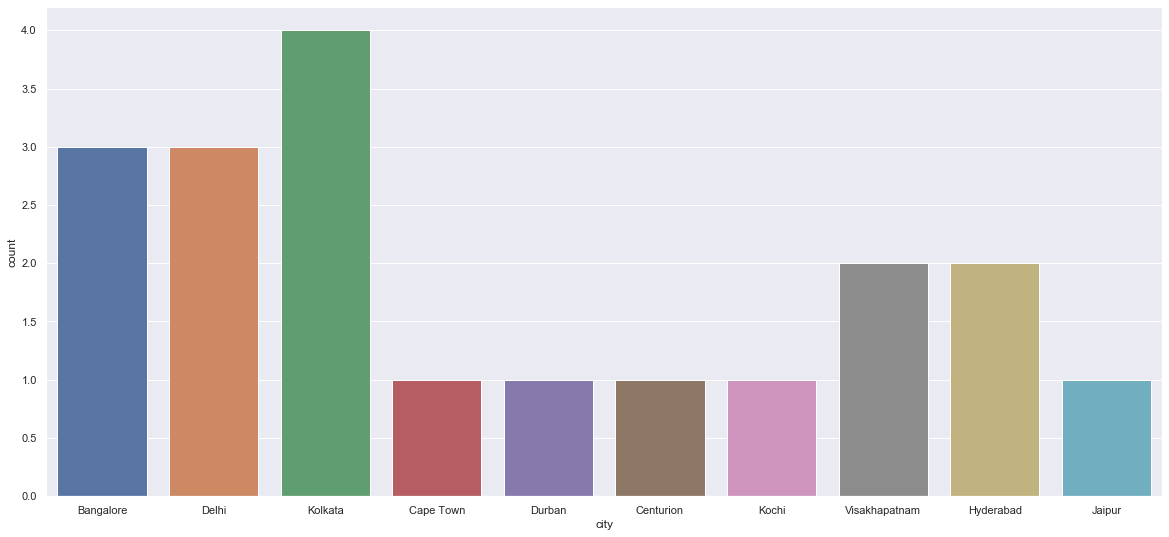

In [30]:

plt.figure(figsize=(20,9))

sns.countplot(data.city[data.dl_applied==1])

plt.show()

## Toss decision

Toss Decisions in %
 field    80.242634
bat      50.779896
Name: toss_decision, dtype: float64


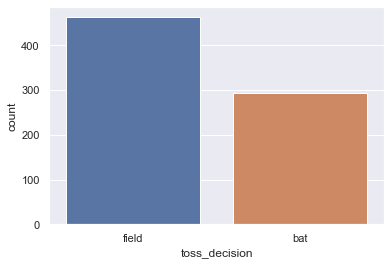

In [31]:

print('Toss Decisions in %\n',((data['toss_decision']).value_counts())/577*100)
sns.countplot(data['toss_decision'])

## Toss decision across seasons

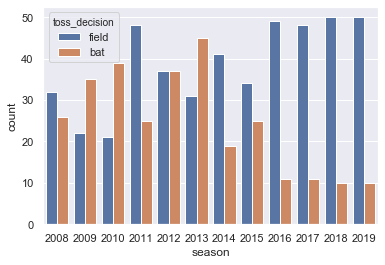

In [32]:

sns.countplot(x='season',hue='toss_decision',data=data)
plt.show()

## Best batsman

C:\python anaconda\lib\site-packages\pandas\plotting\_core.py:1208: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  return ax.bar(x, y, w, bottom=start, log=log, **kwds)


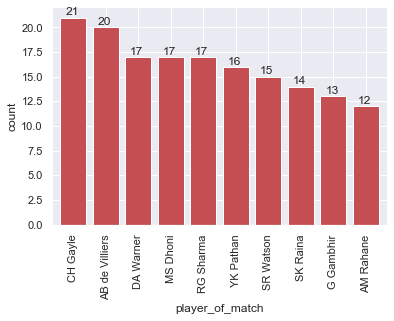

In [33]:

ax = data['player_of_match'].value_counts().head(10).plot.bar(width=.8, color='R') 
ax.set_xlabel('player_of_match') 
ax.set_ylabel('count')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.25))
plt.show()

## winners by year 

In [34]:

for i in range(2008,2017):
    df=((data[data['season']==i]).iloc[-1]) 
    print(df[[1,10]])
   

season                2008
winner    Rajasthan Royals
Name: 116, dtype: object
season               2009
winner    Deccan Chargers
Name: 173, dtype: object
season                   2010
winner    Chennai Super Kings
Name: 233, dtype: object
season                   2011
winner    Chennai Super Kings
Name: 306, dtype: object
season                     2012
winner    Kolkata Knight Riders
Name: 380, dtype: object
season              2013
winner    Mumbai Indians
Name: 456, dtype: object
season                     2014
winner    Kolkata Knight Riders
Name: 516, dtype: object
season              2015
winner    Mumbai Indians
Name: 575, dtype: object
season                   2016
winner    Sunrisers Hyderabad
Name: 635, dtype: object


## maximum no.of  sixes 

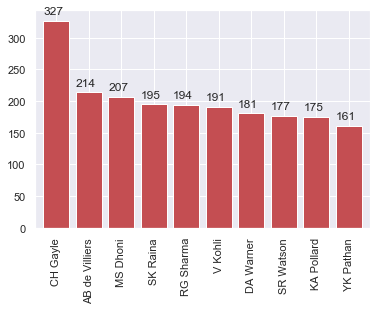

In [35]:

ax=deliveries_df[deliveries_df['batsman_runs']==6].batsman.value_counts()[:10].plot.bar(width=0.8,color='R')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

## Top bowlers

In [ ]:

dismissal_kinds = ["bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]  #since run-out is not creditted to the bowler
ct=deliveries_df[deliveries_df["dismissal_kind"].isin(dismissal_kinds)]
ax=ct['bowler'].value_counts()[:10].plot.bar(width=0.8,color='G')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.10, p.get_height()+1))
plt.show()

## wicket fall

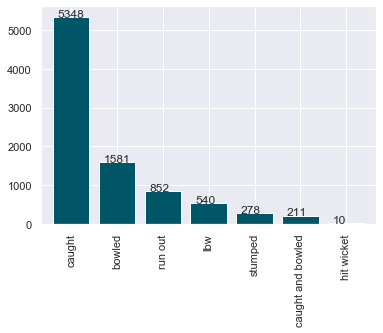

In [36]:

dismiss=["run out","bowled", "caught", "lbw", "stumped", "caught and bowled", "hit wicket"]
ct=deliveries_df[deliveries_df["dismissal_kind"].isin(dismiss)]
ax=ct.dismissal_kind.value_counts()[:10].plot.bar(width=0.8,color='#005566')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.1, p.get_height()+1))
plt.show()

## Team with maximum sixes

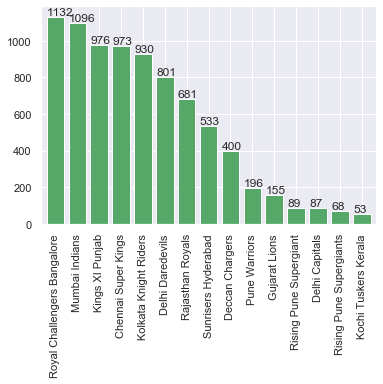

In [37]:
 
ax=deliveries_df[deliveries_df['batsman_runs']==6].batting_team.value_counts().plot.bar(width=0.8,color='G')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()

## maximum no.of  fours

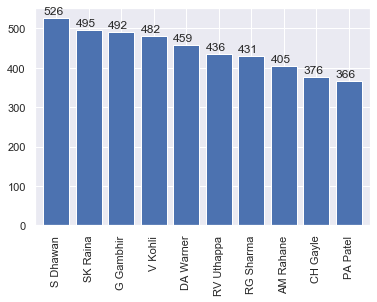

In [38]:

ax=deliveries_df[deliveries_df['batsman_runs']==4].batsman.value_counts()[:10].plot.bar(width=0.8,color='B')
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x(), p.get_height()+10))
plt.show()